In [1]:
import pandas as pd
import numpy as np

In [2]:
ul = pd.read_csv('use_log.csv')
cust_m = pd.read_csv('customer_master.csv')
class_m = pd.read_csv('class_master.csv')
camp_m = pd.read_csv('campaign_master.csv')

- use_tog : 이용 이력 데이터
- cust_m : 회원 정보 데이터 - 탈퇴한 회원을 포함한 모든 회원에 대한 정보/ end date가 비어져 있으면 탈퇴하지 않은 회원
- class_m : 회원구분 데이터 (종일 / 주간 / 야간)
- camp_m : 프로모션 구분 데이터 ( 무료/ 반액할인/ 일반권) 

In [3]:
display(ul.head(), cust_m.head(), class_m.head(), camp_m.head())

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


고객현황 데이터인 cust_m에 class_m 데이처를 결합하여 새로운 데이터 프레임을 생성

In [4]:
cust_join = pd.merge(cust_m, class_m,  on='class', how='left')

In [5]:
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000


In [6]:
cust_join = pd.merge(cust_join, camp_m,  on='campaign_id', how='left')

In [7]:
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [8]:
# 공통컬럼 기준으로 잘 합쳐졌는지 확인
print(len(cust_m))
print(len(cust_join))

4192
4192


In [9]:
cust_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4192 non-null   object
 1   name           4192 non-null   object
 2   class          4192 non-null   object
 3   gender         4192 non-null   object
 4   start_date     4192 non-null   object
 5   end_date       1350 non-null   object
 6   campaign_id    4192 non-null   object
 7   is_deleted     4192 non-null   int64 
 8   class_name     4192 non-null   object
 9   price          4192 non-null   int64 
 10  campaign_name  4192 non-null   object
dtypes: int64(2), object(9)
memory usage: 393.0+ KB


In [10]:
cust_join.isna().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

원본인 cust_m과 결합된 새로운 데이터프레임인 cust_join의 행의 수가 같으므로 열 기준으로 결합이 잘됨

- 결측치를 확인하는 이유는 결합할 때 키가 없거나 결합이 잘못되면 자동으로 결측치가 들어가기 때문 -> 그러므로 결합 후에는 결측치를 확인해주는게 좋음
- 원래 결측치가 있던 end_data에만 결측치가 있으므로 데이터가 잘 들어가져있다라고 확인됨

In [11]:
cust_join['customer_id'].nunique()  # 우리 고객의 수가 4192명이 맞구나

4192

### cust_join 데이터프레임 분석

내가 이 데이터프레임을 봤을 때 어떤 궁금한 점을 뽑아낼 수 있을까?

<예시>
- 어떤 종류의 회원이 있고 어떤 캠페인으로 가장 많이 가입했는지?
- 언제 가입/탈퇴한 회원이 많은지?
- 남녀 비율은 어떤지?
- 탈퇴한 회원들은 얼만큼의 기간동안 스포츠섽터를 다녔는지?

In [12]:
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [13]:
cust_join.class_name.value_counts()

0_종일    2045
2_야간    1128
1_주간    1019
Name: class_name, dtype: int64

In [14]:
cust_join.groupby('class_name')['customer_id'].count()

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [15]:
round((cust_join.groupby('class_name')['customer_id'].count()/ cust_join.shape[0])*100,1)

class_name
0_종일    48.8
1_주간    24.3
2_야간    26.9
Name: customer_id, dtype: float64

In [16]:
# 프로모션 현황 비율 확인
round((cust_join.groupby('class_name')['customer_id'].count()/ cust_join.shape[0])*100,1)

class_name
0_종일    48.8
1_주간    24.3
2_야간    26.9
Name: customer_id, dtype: float64

In [17]:
#성별 현황
cust_join.groupby('gender')['customer_id'].count()

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [18]:
# 성별 비율
round((cust_join.groupby('gender')['customer_id'].count()/cust_join.shape[0])*100,1)

gender
F    47.3
M    52.7
Name: customer_id, dtype: float64

In [19]:
# 탈퇴자 현황
cust_join.groupby('is_deleted')['customer_id'].count()

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [20]:
# 탈퇴자 비율
round((cust_join.groupby('is_deleted')['customer_id'].count()/cust_join.shape[0])*100,1)

is_deleted
0    67.8
1    32.2
Name: customer_id, dtype: float64

####  데이터를 분석함녀서 항상 궁금한 점을 생각해보기
- 남자가 더 많이 가입한 이유가 있을까?
- 탈퇴란 사람들은 왜 탈퇴했을까? (이 사람들은 프로모션만 이용하는가?)

### 데이터를 조건별로 뽑아보기
최신 데이터를 뽑아보기
- 2019년 3월 이용자 뽑기 -> end data가 2019.3.31 이후거나 탈퇴한적이 없어야 함

In [21]:
cust_join['end_date'] = pd.to_datetime(cust_join['end_date'])
cust_new = cust_join[(cust_join['end_date']>=pd.to_datetime('20190331')) | (cust_join['end_date'].isnull())]
cust_new.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반


In [22]:
cust_new['end_date'].unique()

array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [23]:
# 어떤 회원권을 많이 사용하고 있는지 확인 
cust_new.groupby('class_name')['customer_id'].count()

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [24]:
round((cust_new.groupby('class_name')['customer_id'].count()/cust_join.shape[0])*100,1)

class_name
0_종일    34.4
1_주간    16.6
2_야간    19.4
Name: customer_id, dtype: float64

In [25]:
# 프로모션 비율 확인
round((cust_new.groupby('campaign_name')['customer_id'].count()/cust_join.shape[0])*100,1)

campaign_name
0_입회비반액할인     7.4
1_입회비무료       5.8
2_일반         57.3
Name: customer_id, dtype: float64

In [26]:
# 성별 비율 확인
round((cust_new.groupby('gender')['customer_id'].count()/cust_join.shape[0])*100,1)

gender
F    33.4
M    37.0
Name: customer_id, dtype: float64

<데이터 분석 해석>
- 회원권과 성별 변수에 대해서는 전체 데이터 대해 뽑았던 것과 비율이 크게 다르지 않음, 특정 회원권이나 성별이 탈퇴한 것은 아님
- 전체 데이터에서 프로모션 비율중 일반가입이 70% 정도였는데, 최신 사용자 데이터에서는 일반 80% (10%차이)
- 프로모션으로 가입한 사람은 일반 가입한 사람보다 계속 이용할 가능성이 낮을 수 있지 않을까?


### 이용이력 데이터분석

In [27]:
ul.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


회원이 스포츠센터를 이용할 때 시간이 찍히기 때문에 시간적 요소를 분석해볼수 있겠다

<예시>
- 한 달 이용 횟수의 변화
- 회원이 스포츠센터를 정기적으로 이용하는지
- 회원들이 월 별 스포츠센터를 이용하는 평균 수치, 중앙값, 최대, 최소값

In [28]:
ul['usedate'] = pd.to_datetime(ul['usedate'])      # 데이터를 날짜형 데이터로 변환

In [29]:
ul['년월'] = ul['usedate'].dt.strftime('%Y%m')

In [30]:
ul.head()

,log_id,customer_id,usedate,년월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [31]:
# 월별, 고객 id별 이용횟수 
ul_month = ul.groupby(['년월','customer_id'],as_index = False).count()
ul_month

,년월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


### 월별 고객의 스포츠 센터 사용횟수 데이터

In [32]:
# 컬럼 이름 변경
ul_month.rename(columns = {'log_id' : 'cnt'}, inplace = True)
# usedate 열 삭제
ul_month.drop('usedate', axis=1, inplace=True)
ul_month.head

<bound method NDFrame.head of            년월 customer_id  cnt
0      201804    AS002855    4
1      201804    AS009013    2
2      201804    AS009373    3
3      201804    AS015315    6
4      201804    AS015739    7
...       ...         ...  ...
36837  201903    TS995853    8
36838  201903    TS998593    8
36839  201903    TS999079    3
36840  201903    TS999231    6
36841  201903    TS999855    4

[36842 rows x 3 columns]>

In [33]:
# 고객별 월평균 사용횟수 
ul_cust = ul_month.groupby('customer_id')['cnt'].agg([np.mean,np.median, np.max,np.min])

ul_cust = ul_cust.reset_index(drop=False)
ul_cust.head()

,customer_id,mean,median,amax,amin
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


#### 정기적으로 스포츠센터를 사용하는 고객인지 확인

 - 매주 같은 요일에 스포츠센터에 왔는지 아닌지로 판단해보기
 - 월이나 요일별로 방문한 횟수의 최대값이 4이상인 요일에 하나라도 있으면 이 회원은 정기 사용자로 판단

In [34]:
# 요일 뽑기
# weekday : 월요일 -0, 일요일-6
ul['weekday'] = ul['usedate'].dt.weekday
ul.head()

,log_id,customer_id,usedate,년월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6


In [35]:
ul_week = ul.groupby(['customer_id','년월', 'weekday'], as_index = False).count()
ul_week

,customer_id,년월,weekday,log_id,usedate
0,AS002855,201804,5,4,4
1,AS002855,201805,2,1,1
2,AS002855,201805,5,4,4
3,AS002855,201806,5,5,5
4,AS002855,201807,1,1,1
...,...,...,...,...,...
93328,TS999855,201901,1,1,1
93329,TS999855,201901,5,4,4
93330,TS999855,201901,6,1,1
93331,TS999855,201902,5,4,4


In [36]:
ul_week.rename(columns = {'log_id':'cnt'}, inplace = True)
ul_week

,customer_id,년월,weekday,cnt,usedate
0,AS002855,201804,5,4,4
1,AS002855,201805,2,1,1
2,AS002855,201805,5,4,4
3,AS002855,201806,5,5,5
4,AS002855,201807,1,1,1
...,...,...,...,...,...
93328,TS999855,201901,1,1,1
93329,TS999855,201901,5,4,4
93330,TS999855,201901,6,1,1
93331,TS999855,201902,5,4,4


In [37]:
del ul_week['usedate']
ul_week.head()

,customer_id,년월,weekday,cnt
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


-> 토요일마다 정기적으로 방문사람인가..?

데이터프레임을 가지고 cnt 4 이상이면1, 아니면 0인 컬럼 만들기

In [38]:
ul_week = ul_week.groupby('customer_id', as_index=False)[['cnt']].max()
ul_week

,customer_id,cnt
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5
...,...,...
4187,TS995853,5
4188,TS998593,5
4189,TS999079,5
4190,TS999231,5


In [39]:
# 방법1 : apply lambda
ul_week['flag1'] = ul_week['cnt'].apply(lambda x : 1 if x>=4 else 0)

In [40]:
# 방법2 : 불리언 인덱싱
ul_week['flag2'] = 0
is_over4 =(ul_week['cnt']>=4)
ul_week.loc[(is_over4), 'flag2']

0       0
1       0
3       0
4       0
5       0
       ..
4187    0
4188    0
4189    0
4190    0
4191    0
Name: flag2, Length: 3413, dtype: int64

In [41]:
# 방법3 : where문 사용
ul_week['flag3'] = 0
# 조건이 참이면 0이고 거짓임녀 1을 넣음
ul_week['flag3'] = ul_week['flag3'].where(ul_week['cnt']<4, 1)

In [42]:
ul_week

,customer_id,cnt,flag1,flag2,flag3
0,AS002855,5,1,0,1
1,AS008805,4,1,0,1
2,AS009013,2,0,0,0
3,AS009373,5,1,0,1
4,AS015233,5,1,0,1
...,...,...,...,...,...
4187,TS995853,5,1,0,1
4188,TS998593,5,1,0,1
4189,TS999079,5,1,0,1
4190,TS999231,5,1,0,1


### 고객 데이터와 이용이력 데이터 조인

In [43]:
display(cust_join, ul_cust, ul_week)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반


,customer_id,mean,median,amax,amin
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...
4187,TS995853,9.500000,9.5,11,8
4188,TS998593,8.142857,8.0,9,7
4189,TS999079,4.916667,5.5,9,2
4190,TS999231,4.666667,5.0,8,1


,customer_id,cnt,flag1,flag2,flag3
0,AS002855,5,1,0,1
1,AS008805,4,1,0,1
2,AS009013,2,0,0,0
3,AS009373,5,1,0,1
4,AS015233,5,1,0,1
...,...,...,...,...,...
4187,TS995853,5,1,0,1
4188,TS998593,5,1,0,1
4189,TS999079,5,1,0,1
4190,TS999231,5,1,0,1


3개 데이터프레임의 공통 컬럼은 'customer-id -> 이 컬럼을 기준으로 데이터를 합침

In [44]:
cust_join = pd.merge(cust_join, ul_cust,on = 'customer_id', how = 'left')
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1


In [45]:
cust_join = pd.merge(cust_join, ul_week[['customer_id','flag1']], on='customer_id',how = 'left')

In [46]:
print(len(cust_join))

4192


In [48]:
# 길이
cust_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag1
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0


In [49]:
cust_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
amax                0
amin                0
flag1               0
dtype: int64

#### 회원기간 계산

In [50]:
cust_join['cal_date'] = cust_join['end_date']
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag1,cal_date
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,NaT
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,NaT
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,NaT
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,NaT
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,NaT


In [54]:
# end_date가 비워진 경우에는 cal_date에 2019-04-30으로 채워주기
cust_join['cal_date'].fillna(pd.to_datetime('20190430'), inplace=True)

In [55]:
cust_join['star_date'] = pd.to_datetime(cust_join['start_date'])
cust_join['end_date'] = pd.to_datetime(cust_join['end_date'])
cust_join['cal_date'] = pd.to_datetime(cust_join['cal_date'])

In [57]:
# 회원기간을 계산한 'mem_period' 컬럼 추가
cust_join['mem_period'] = (cust_join['cal_date'] - cust_join['star_date']) / np.timedelta64(1,'M')

In [58]:
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag1,cal_date,star_date,mem_period
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,2015-05-01,47.968131
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,2015-05-01,47.968131
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,2015-05-01,47.968131
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,2015-05-01,47.968131
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,2015-05-01,47.968131


#### 고객 행동의 통계랑 파악

In [60]:
cust_join[['mean','median','amax','amin']].describe()

,mean,median,amax,amin
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


1인당 월 평균 5.3회, 1인당 중간값 5.2, 1인당 최대 이용횟수 7.8회 1 인당 최소 이용횟수 3회 

In [63]:
# 전체 고객 중 정기적으로 스포츠센터를 사용하는 비율
round(cust_join.groupby('flag1').count()['customer_id'] / cust_join.shape[0] * 100, 1)

flag1
0    18.6
1    81.4
Name: customer_id, dtype: float64

- flag가 1이면 한달동안 특정요일에 4번이상 스포츠센터를 방문함 -> 정기적으로 이용하는 사람이다(가정)
- 정기적으로 스포츠센터를 이용하는 사람은 81%

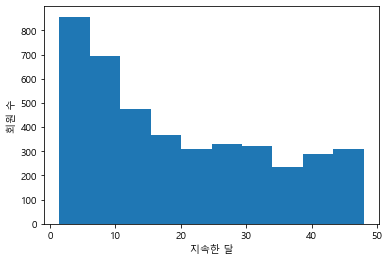

In [64]:
# 전체 회원들 중에서 얼만큼 스포츠 센터를 다녔는지 기간을 뽑아보겠디
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.hist(cust_join['mem_period'])
plt.xlabel('지속한 달')
plt.ylabel('회원 수')
plt.show()

회원 수가 유지되는 개월 수가 가장 많은 기간은 0-10개우러 사이이고, 10개월 이상 다니고 있는 회원 수의 분포는 비슷비슷하네?

- 그럼 10개월이 회원을 지속하는 고비일수도 있겠네?
- 그럼 10개월 넘게 다니도록 하려면 어떻게 해야할까?

#### 탈퇴회원과 지속하는 회원과의 차이를 파악

In [65]:
#탈퇴회원 통계량
cust_join[cust_join['is_deleted']==1].describe()

,is_deleted,price,mean,median,amax,amin,flag1,mem_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.878534
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.095672
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.445615
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.928233
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.950882
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.959178
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.951210


In [69]:
# 다니고있는 회원의 통계량 
cust_join[cust_join['is_deleted']==0].describe()

,is_deleted,price,mean,median,amax,amin,flag1,mem_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,24.840061
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.827461
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.511325
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.813405
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.936857
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.943243
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.968131


 - 탈퇴회원은 지속회원보다 매월 이용횟수가 평균, 중간값, 최대, 최소 모두 작용
- flag를 보면 탈퇴회원은 0.45 지속회원은 0.98로 거의1
- 지속회원은 한달동안 특정요일에 매주 방문하는 비율이 거의 전체
- 탈퇴회원은 회원유지기간이 평균 8주 지속회원은 평균 24주

In [70]:
cust_join.to_csv('customer_join.csv', index=False)